# Arrival Time Prediction - Prediction
This is the fourth and final notebook on GP regression for arrival time prediction. In this notebook we will finally make the predictions and take a look at the the residuals. First off we'll do the usual import stuff, and load the test data together with the synchonisation GPs trained in the previous notebook.

In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import scale
import time
import pickle
import tensorflow as tf
import gp_gpy as gp
import plot 

sns.set(style="darkgrid")
np.random.seed(1)
data = pd.read_pickle('train.pkl')
travel_times = pd.read_pickle('travel_times.pkl')
n_segs = data.seg.unique()
synch_traj_n = 7 # traj 7 was used to train synch gps
route_n = 3 # all data used currently is from route 3

# These guys are not used as of now since all data comes from one route and one traj
def load_synch_gps(data):
    n_routes = [route_n] # should be computed from the data when all is done
    return {route_n: load_route_synch_gps(route_n) for route_n in n_routes}

def load_route_synch_gp(data, route_n):
    n_trajs = data.traj.unique()
    return {traj_n: load_traj_synch_gps(data[data.traj == traj_n], route_n, traj_n) for traj_n in n_trajs}

def load_traj_synch_gps(data, route_n, traj_n):
    n_segs = data.seg.unique()
    return {seg_n: load_seg_synch_gp(data[data.seg == seg_n], route_n, traj_n, seg_n) for seg_n in n_segs}
    
# This guy is used though
def load_seg_synch_gp(data, route_n, traj_n, seg_n):
    return gp.load(data, ['lat', 'lon'], ['progress'], 'synch', route_n, traj_n, seg_n)
    
n_segs = data.seg.unique()
synch_gps = {seg_n: load_seg_synch_gp(data, route_n, synch_traj_n, seg_n) for seg_n in n_segs}

## Training
With all that loaded we will now fit one GP for each segment in each trajectory. The function we want to fit is $f : \tau \mapsto \mathcal{R}^2$, which is the inverse of the synchronisation function. This will be used to compute the likelihood of a new trajecotry. As you might guess, this will take a while.

Optimization restart 1/5, f = -504.9426203789608
Optimization restart 2/5, f = -504.9426140924934
Optimization restart 3/5, f = -498.95308123279096
Optimization restart 4/5, f = -504.94261917061
Optimization restart 5/5, f = -504.9426191723294
(53, 8)
Optimization restart 1/5, f = 229.75902474071626
Optimization restart 2/5, f = 229.76800890921308
Optimization restart 3/5, f = 229.75909594981567
Optimization restart 4/5, f = 229.75897901449406
Optimization restart 5/5, f = 229.75882419499897
Optimization restart 1/5, f = -352.0893576780882
Optimization restart 2/5, f = -352.0893637888829
Optimization restart 3/5, f = -352.0893670418472
Optimization restart 4/5, f = -352.0893659131273
Optimization restart 5/5, f = -352.08935752556897
(36, 8)
Optimization restart 1/5, f = 147.35406294835929
Optimization restart 2/5, f = 147.35419656603597
Optimization restart 3/5, f = 147.35444028131667
Optimization restart 4/5, f = 147.35389252048526
Optimization restart 5/5, f = 147.35381598549623
Opti

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 4/5, f = -281.7272191549699
Optimization restart 5/5, f = -282.1439880967626
(26, 8)
Optimization restart 1/5, f = 108.31209092281767
Optimization restart 2/5, f = 108.31208901965823
Optimization restart 3/5, f = 108.31208854163977
Optimization restart 4/5, f = 108.31208855695667
Optimization restart 5/5, f = 108.31208858020621
Optimization restart 1/5, f = -522.7484430237625


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square


Optimization restart 2/5, f = -522.6718965621022
Optimization restart 3/5, f = -524.0183384449253
Optimization restart 4/5, f = -524.4330249246065
Optimization restart 5/5, f = -522.6739627074949
(50, 8)
Optimization restart 1/5, f = 207.3217747486865
Optimization restart 2/5, f = 207.32177475049605
Optimization restart 3/5, f = 207.92970511430724
Optimization restart 4/5, f = 207.3217747503219
Optimization restart 5/5, f = 207.32177474928739
Optimization restart 1/5, f = -494.58604802474133
Optimization restart 2/5, f = -492.7557616551876
Optimization restart 3/5, f = -497.2088260860339
Optimization restart 4/5, f = -493.0532532243801
Optimization restart 5/5, f = -500.3442206178162
(51, 8)
Optimization restart 1/5, f = 216.57967355613184
Optimization restart 2/5, f = 216.57910856111758
Optimization restart 3/5, f = 216.5786687730772
Optimization restart 4/5, f = 216.57896512066827
Optimization restart 5/5, f = 216.5789145451696
Optimization restart 1/5, f = -656.1974824893535
Optimiz

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = 268.2686963647389
Optimization restart 2/5, f = 268.26869635915165
Optimization restart 3/5, f = 268.26869636197677
Optimization restart 4/5, f = 268.2686963590487
Optimization restart 5/5, f = 268.2686963625014


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = -361.96375628915877
Optimization restart 2/5, f = -358.38462402603955
Optimization restart 3/5, f = -347.5517111631384
Optimization restart 4/5, f = -357.34903981587536
Optimization restart 5/5, f = -360.4943675555321
(37, 8)
Optimization restart 1/5, f = 119.6663607208144
Optimization restart 2/5, f = 119.66636072081994
Optimization restart 3/5, f = 119.66636072143444
Optimization restart 4/5, f = 119.6663607209124
Optimization restart 5/5, f = 119.66636072081262
Optimization restart 1/5, f = -1122.933743447098
Optimization restart 2/5, f = -1127.54904648124
Optimization restart 3/5, f = -1127.5490491633518
Optimization restart 4/5, f = -1122.9337413103513
Optimization restart 5/5, f = -1122.4906376833237
(128, 8)
Optimization restart 1/5, f = 617.335019400346


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/5, f = 625.2798388604715
Optimization restart 3/5, f = 617.335019398919
Optimization restart 4/5, f = 617.3350194145606
Optimization restart 5/5, f = 617.3350194278981
Optimization restart 1/5, f = -463.10028177169426
Optimization restart 2/5, f = -465.18240392922246
Optimization restart 3/5, f = -472.9065001873712


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 4/5, f = -462.6813896142402
Optimization restart 5/5, f = -472.9092493028219
(50, 8)
Optimization restart 1/5, f = 209.1293680475081
Optimization restart 2/5, f = 209.13068674705772
Optimization restart 3/5, f = 209.12958341038902
Optimization restart 4/5, f = 209.1303850723374
Optimization restart 5/5, f = 209.12947889702457
Optimization restart 1/5, f = -486.9340080518648
Optimization restart 2/5, f = -493.76842840591985
Optimization restart 3/5, f = -487.3300539987398
Optimization restart 4/5, f = -488.08915033914525
Optimization restart 5/5, f = -489.0178103878832
(49, 8)
Optimization restart 1/5, f = 188.63920673507525
Optimization restart 2/5, f = 188.63920671668873
Optimization restart 3/5, f = 188.63920677561046
Optimization restart 4/5, f = 188.63920671524818


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 188.63920671521632
Optimization restart 1/5, f = -435.4097026121601


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -435.1018440646029
Optimization restart 3/5, f = -434.28666646459095
Optimization restart 4/5, f = -435.4097025722149
Optimization restart 5/5, f = -435.40969634614316
(46, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 220.61893391398098
Optimization restart 2/5, f = 220.61416153437744
Optimization restart 3/5, f = 220.61828504529194
Optimization restart 4/5, f = 220.61968836751072
Optimization restart 5/5, f = 220.61585125253887


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -331.40960512822085
Optimization restart 2/5, f = -331.4096010348523
Optimization restart 3/5, f = -331.40960225115214
Optimization restart 4/5, f = -331.4096132589062
Optimization restart 5/5, f = -331.4096054478289
(33, 8)
Optimization restart 1/5, f = 135.15015095798628
Optimization restart 2/5, f = 135.15015095798907


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 3/5, f = 135.15015095844407
Optimization restart 4/5, f = 135.15015095801277
Optimization restart 5/5, f = 132.32517988547067
Optimization restart 1/5, f = -504.7969688591181


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -503.48012356991194
Optimization restart 3/5, f = -504.5329504233879
Optimization restart 4/5, f = -503.47925346903344


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 5/5, f = -505.3782708766561
(49, 8)
Optimization restart 1/5, f = 221.73772106811174
Optimization restart 2/5, f = 221.73772107001005
Optimization restart 3/5, f = 221.73772106863572


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 4/5, f = 221.73772193160679
Optimization restart 5/5, f = 221.73772106348324
Optimization restart 1/5, f = -261.8735261939336


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -261.5978519277384
Optimization restart 3/5, f = -257.98844460657455
Optimization restart 4/5, f = -263.65215047022815
Optimization restart 5/5, f = -261.30070275947764
(24, 8)
Optimization restart 1/5, f = 98.1712532178081
Optimization restart 2/5, f = 98.17125326149069
Optimization restart 3/5, f = 98.1712535927798
Optimization restart 4/5, f = 98.17125321193308
Optimization restart 5/5, f = 98.17125325075874


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -529.874810298947
Optimization restart 2/5, f = -531.9457841394519
Optimization restart 3/5, f = -529.7593050698948
Optimization restart 4/5, f = -530.4062464947369


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = -531.4572426154959
(51, 8)
Optimization restart 1/5, f = 212.38401473783387
Optimization restart 2/5, f = 211.94085705517588
Optimization restart 3/5, f = 211.94085707052474
Optimization restart 4/5, f = 212.38392311398175
Optimization restart 5/5, f = 211.94085705447787
Optimization restart 1/5, f = -495.7285651528729


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -495.9961426011819
Optimization restart 3/5, f = -504.96107412673075
Optimization restart 4/5, f = -495.5310946241949
Optimization restart 5/5, f = -497.70507259767624
(51, 8)
Optimization restart 1/5, f = 211.50609538800745
Optimization restart 2/5, f = 211.50634492538546
Optimization restart 3/5, f = 211.50602115360766
Optimization restart 4/5, f = 211.5065154180152


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 211.50737733603927
Optimization restart 1/5, f = -671.7238501526367


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -673.8962309000083
Optimization restart 3/5, f = -669.717393686278
Optimization restart 4/5, f = -670.8679780454768
Optimization restart 5/5, f = -673.5393740151403
(64, 8)
Optimization restart 1/5, f = 276.46227419888606
Optimization restart 2/5, f = 276.4622741988366
Optimization restart 3/5, f = 276.46227419885076
Optimization restart 4/5, f = 276.4622742328607


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 276.4622741988448
Optimization restart 1/5, f = -370.83682932122207
Optimization restart 2/5, f = -360.1750485005421


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 3/5, f = -380.9040044171648
Optimization restart 4/5, f = -372.98092013172715
Optimization restart 5/5, f = -372.382539081211
(38, 8)
Optimization restart 1/5, f = 121.35481449442642


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = 121.35481657340848
Optimization restart 3/5, f = 121.35481449078655
Optimization restart 4/5, f = 121.35481450390249
Optimization restart 5/5, f = 121.35481449083616
Optimization restart 1/5, f = -1125.5800534465243
Optimization restart 2/5, f = -1125.5800566086155
Optimization restart 3/5, f = -1130.7422226260628
Optimization restart 4/5, f = -1130.7422232706158
Optimization restart 5/5, f = -1125.5800552223195
(128, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 615.4430645563451
Optimization restart 2/5, f = 615.4430664440583
Optimization restart 3/5, f = 615.4430645559611
Optimization restart 4/5, f = 615.4430658603683
Optimization restart 5/5, f = 615.4430645573791
Optimization restart 1/5, f = -447.7986933588903


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -453.78019737928764
Optimization restart 3/5, f = -449.1737821625874
Optimization restart 4/5, f = -449.3588053795647
Optimization restart 5/5, f = -447.16813317756885
(48, 8)
Optimization restart 1/5, f = 208.00843002277134
Optimization restart 2/5, f = 208.0084860083162
Optimization restart 3/5, f = 208.0084543624188
Optimization restart 4/5, f = 208.00854027975242


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 208.00748068661946
Optimization restart 1/5, f = -373.6907931785962


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -374.2257708280323
Optimization restart 3/5, f = -372.8631345416772
Optimization restart 4/5, f = -372.7459746307202
Optimization restart 5/5, f = -373.68156705243774
(38, 8)
Optimization restart 1/5, f = 162.84334808344286
Optimization restart 2/5, f = 162.8433480856334
Optimization restart 3/5, f = 162.84334809793097
Optimization restart 4/5, f = 162.84334807940164


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 162.8433480798559
Optimization restart 1/5, f = -499.07391527066056


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/5, f = -500.63358594557076
Optimization restart 3/5, f = -499.07390893832314
Optimization restart 4/5, f = -499.0739173093426
Optimization restart 5/5, f = -499.07391400880215
(53, 8)
Optimization restart 1/5, f = 250.58211012325103
Optimization restart 2/5, f = 250.58220173808894
Optimization restart 3/5, f = 250.58199351891562


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 4/5, f = 250.58179777397044
Optimization restart 5/5, f = 250.58623674490417
Optimization restart 1/5, f = -392.0947922190418
Optimization restart 2/5, f = -392.0947924319747


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 3/5, f = -392.09479048402636
Optimization restart 4/5, f = -392.0947940634903
Optimization restart 5/5, f = -392.0947956971801
(39, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 158.08832670818794
Optimization restart 2/5, f = 158.08832674647041
Optimization restart 3/5, f = 153.42197819036429
Optimization restart 4/5, f = 158.08836635145528
Optimization restart 5/5, f = 153.4219781897835


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -507.2007486466631
Optimization restart 2/5, f = -506.8535923553585
Optimization restart 3/5, f = -508.0137232802193
Optimization restart 4/5, f = -507.7866390945728
Optimization restart 5/5, f = -507.91515424877605
(49, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = 215.2795347565754
Optimization restart 2/5, f = 215.81062754191817
Optimization restart 3/5, f = 215.27953475369426
Optimization restart 4/5, f = 215.27953475434938
Optimization restart 5/5, f = 215.27953476283793


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -399.4743902079986
Optimization restart 2/5, f = -396.82039520308774
Optimization restart 3/5, f = -377.71575275124684


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 4/5, f = -399.0988991481287
Optimization restart 5/5, f = -377.7157624037742
(36, 8)
Optimization restart 1/5, f = 141.36937393807858
Optimization restart 2/5, f = 141.3693739440923
Optimization restart 3/5, f = 141.36937429762605
Optimization restart 4/5, f = 141.36937519364383
Optimization restart 5/5, f = 141.36937393426822


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -561.1603840370984
Optimization restart 2/5, f = -561.1603914689075
Optimization restart 3/5, f = -561.1603895093594
Optimization restart 4/5, f = -561.1599962134871
Optimization restart 5/5, f = -561.1603910342634
(54, 8)
Optimization restart 1/5, f = 213.00861004851075


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = 213.0086150000623
Optimization restart 3/5, f = 213.00860994857217
Optimization restart 4/5, f = 213.00860991947653
Optimization restart 5/5, f = 213.00860993333504


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = -490.64739761643636
Optimization restart 2/5, f = -487.70445134080546
Optimization restart 3/5, f = -485.5328497867897
Optimization restart 4/5, f = -484.8434361801877
Optimization restart 5/5, f = -484.5234854448711
(50, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 211.55112821287352
Optimization restart 2/5, f = 211.5515888567533
Optimization restart 3/5, f = 211.55099412526855
Optimization restart 4/5, f = 211.55139784538378
Optimization restart 5/5, f = 211.5508993939869


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = -670.4091203502276
Optimization restart 2/5, f = -669.4816586409149
Optimization restart 3/5, f = -670.8947339020865
Optimization restart 4/5, f = -670.236203473125
Optimization restart 5/5, f = -670.8736705820581
(64, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 274.34228110939335
Optimization restart 2/5, f = 274.3422811093774
Optimization restart 3/5, f = 274.3422811113252
Optimization restart 4/5, f = 274.3422811101962
Optimization restart 5/5, f = 274.34228118961073


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/5, f = -375.4678517192343
Optimization restart 2/5, f = -375.27368705322914
Optimization restart 3/5, f = -371.553070184943
Optimization restart 4/5, f = -375.7320602510008
Optimization restart 5/5, f = -375.120578669412
(38, 8)
Optimization restart 1/5, f = 130.4969369871029
Optimization restart 2/5, f = 130.49715706029343
Optimization restart 3/5, f = 130.49701263732433


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 4/5, f = 130.4969401807823
Optimization restart 5/5, f = 130.49724351802186
Optimization restart 1/5, f = -1014.2568960917749


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -1014.256898546591
Optimization restart 3/5, f = -1011.6549693599211
Optimization restart 4/5, f = -1014.2074674077437
Optimization restart 5/5, f = -1014.2568981323395
(117, 8)


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 1/5, f = 561.326325973107
Optimization restart 2/5, f = 561.3263259729517
Optimization restart 3/5, f = 561.3263259730485
Optimization restart 4/5, f = 561.3263274271153
Optimization restart 5/5, f = 561.3263259728852
Optimization restart 1/5, f = -425.5939928093351


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/5, f = -428.53786342612534
Optimization restart 3/5, f = -436.42306171107737
Optimization restart 4/5, f = -429.2756328794442
Optimization restart 5/5, f = -435.3230699064121
(46, 8)
Optimization restart 1/5, f = 195.38613645299074
Optimization restart 2/5, f = 195.38578902720627
Optimization restart 3/5, f = 195.38579856400284
Optimization restart 4/5, f = 195.38657621247353


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = 195.38608636802144
Optimization restart 1/5, f = -353.942377269278


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 2/5, f = -353.31212927169616
Optimization restart 3/5, f = -354.5082134726904
Optimization restart 4/5, f = -353.86451430115886


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\rbf.py:54: RuntimeWarning:invalid value encountered in multiply
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Optimization restart 5/5, f = -353.5477830048217
(36, 8)
Optimization restart 1/5, f = 153.5830962462231
Optimization restart 2/5, f = 153.58309624737757
Optimization restart 3/5, f = 153.58309624645278
Optimization restart 4/5, f = 153.5830962464211
Optimization restart 5/5, f = 153.58309624634057


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


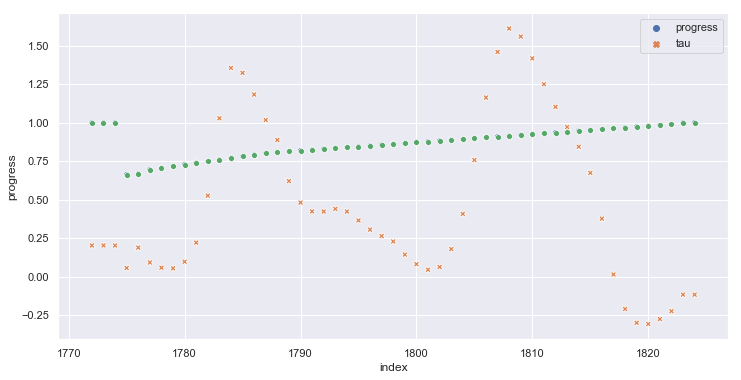

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


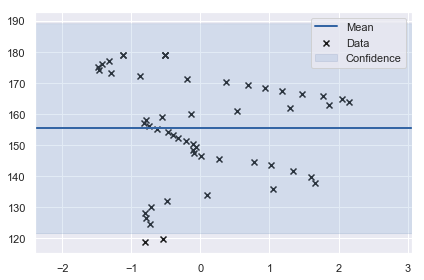

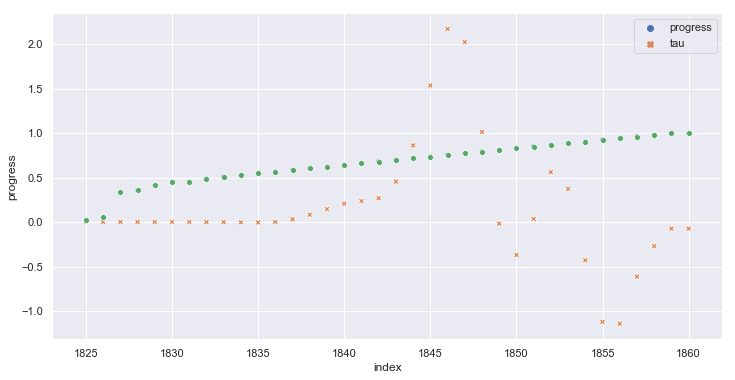

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


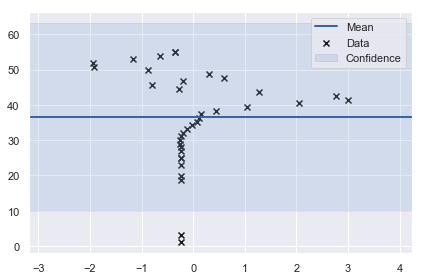

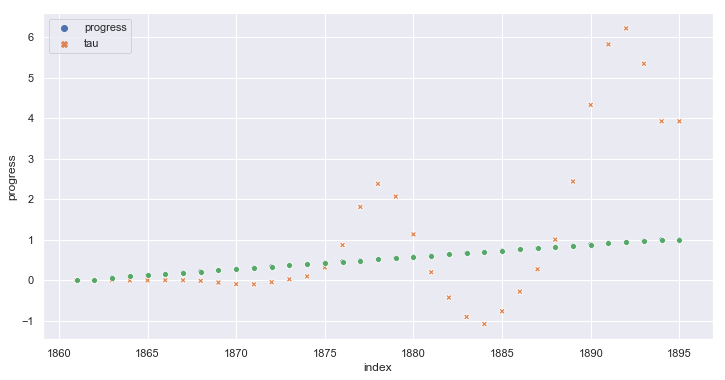

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


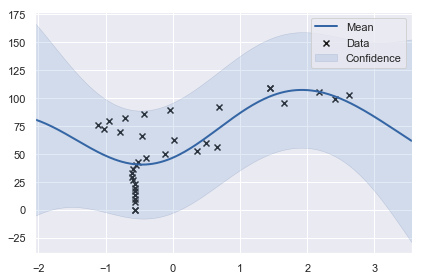

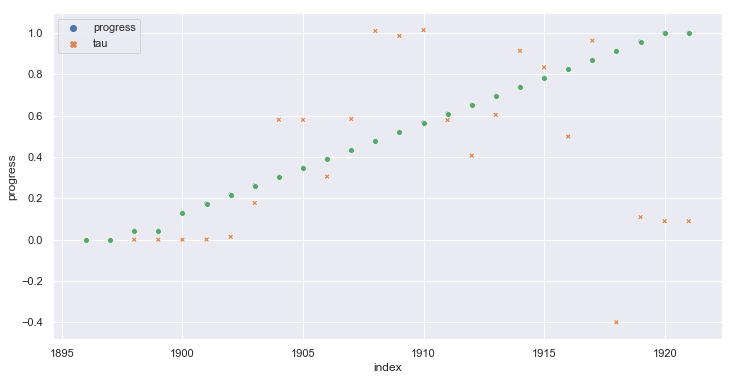

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


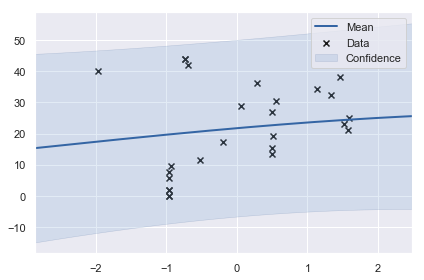

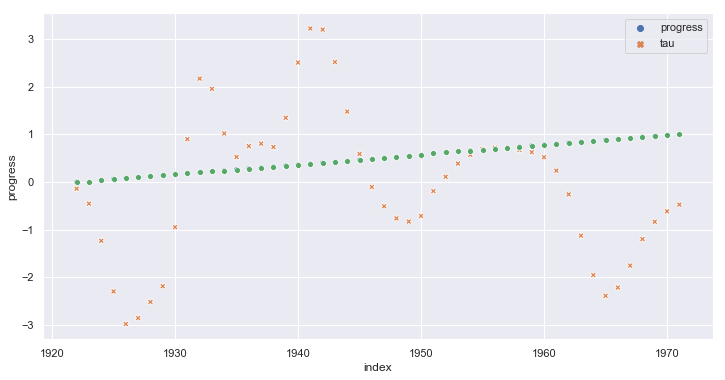

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


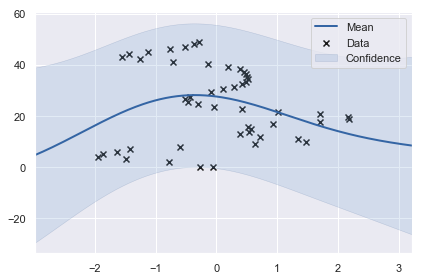

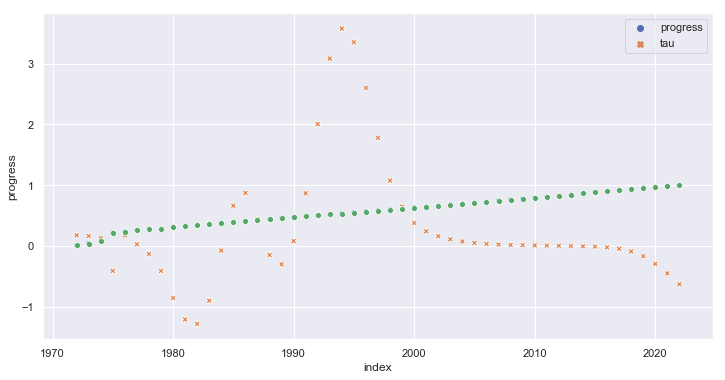

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


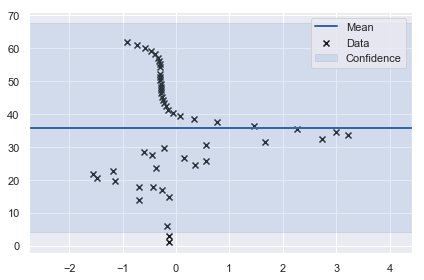

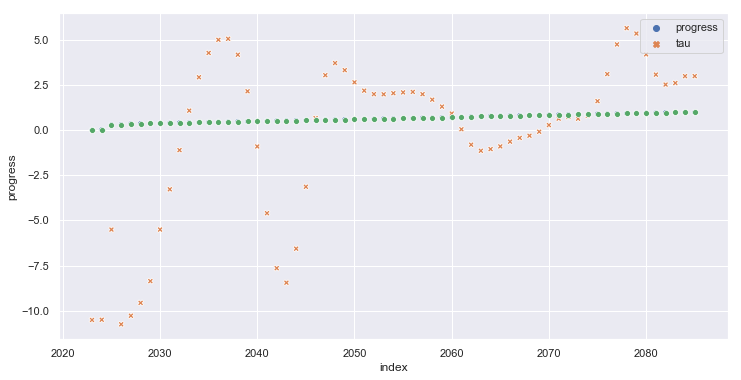

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


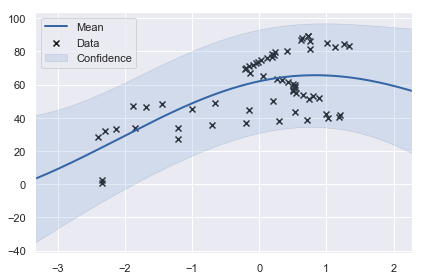

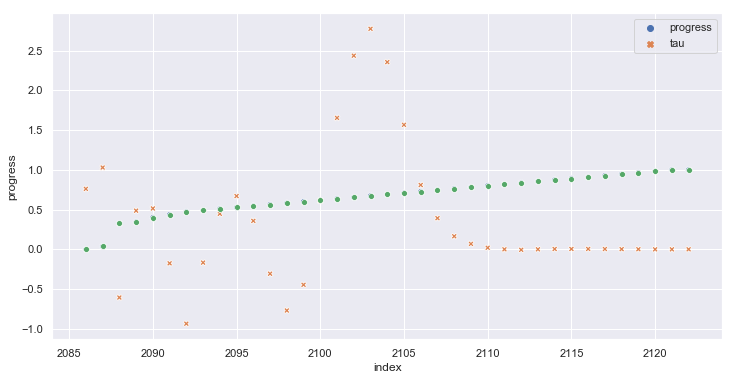

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


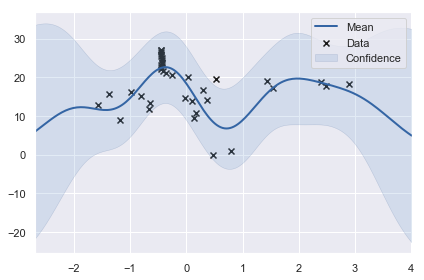

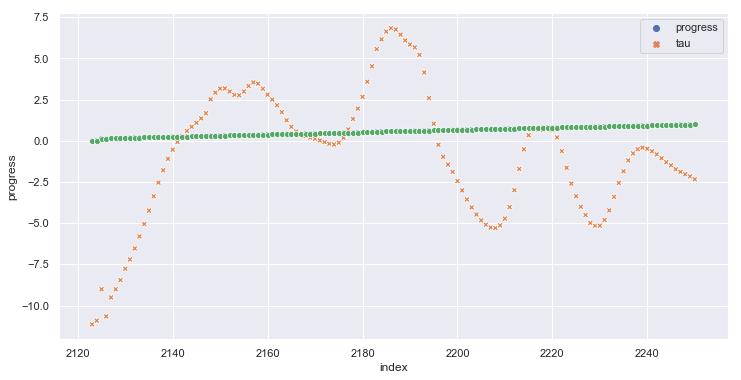

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


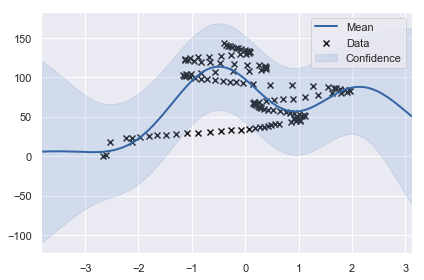

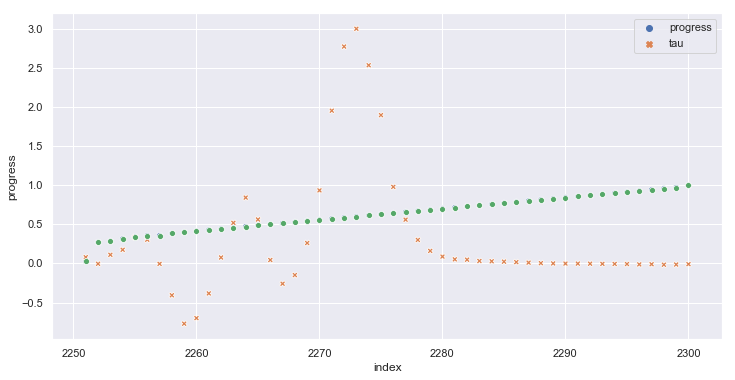

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


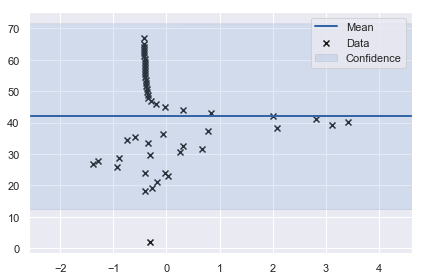

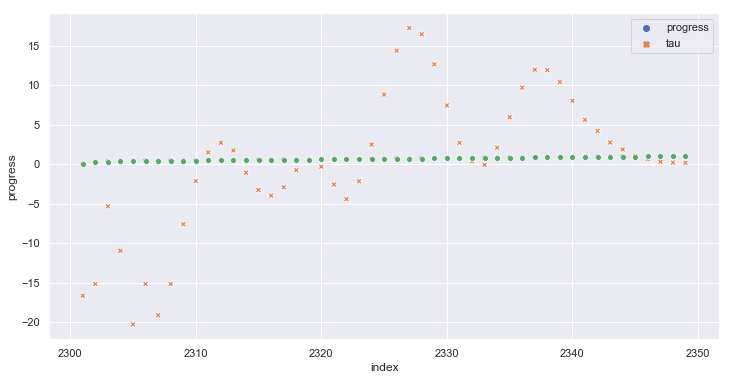

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


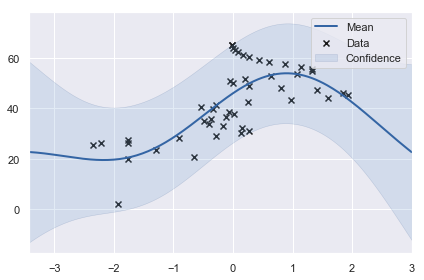

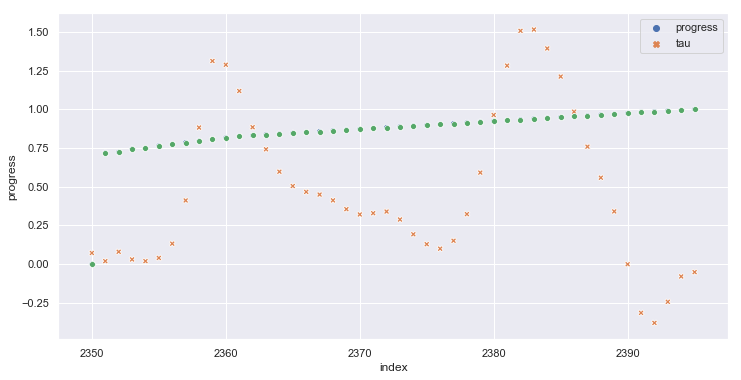

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


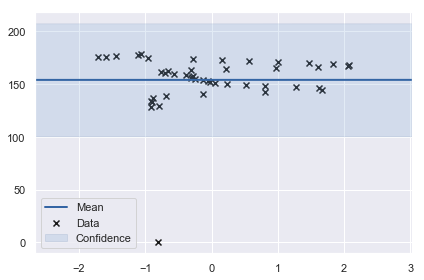

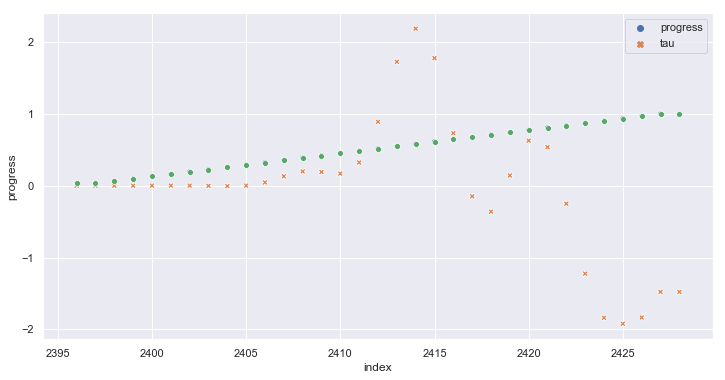

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


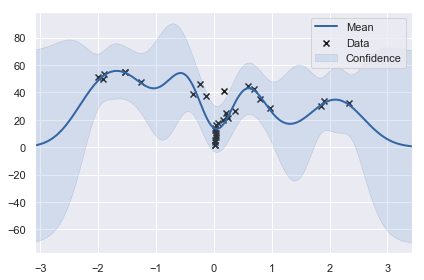

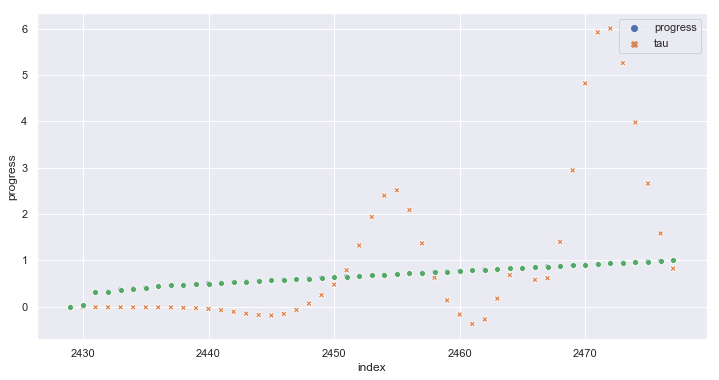

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


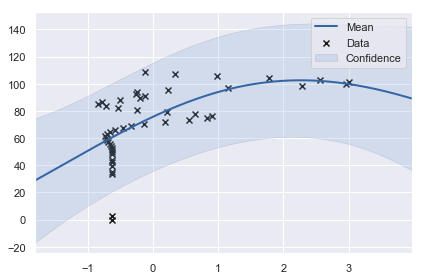

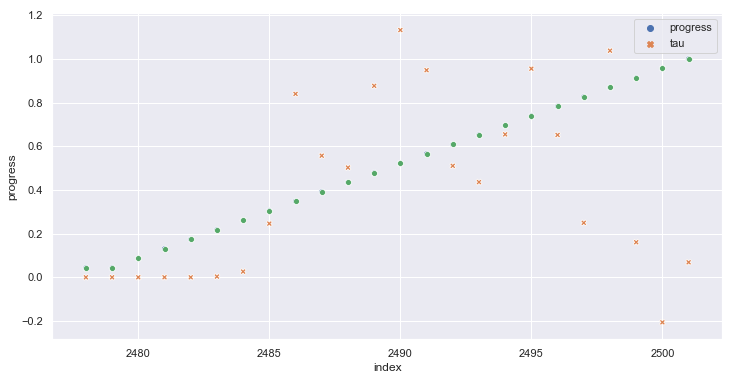

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


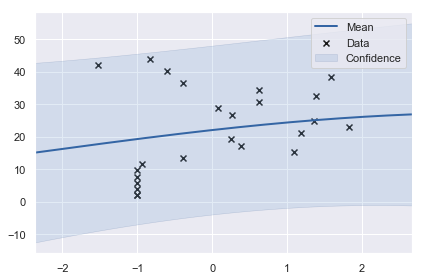

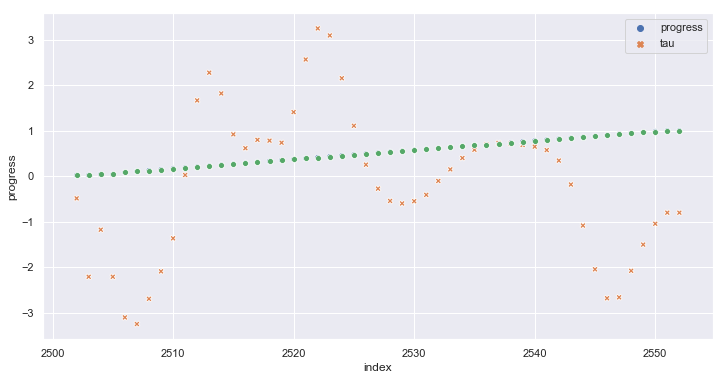

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


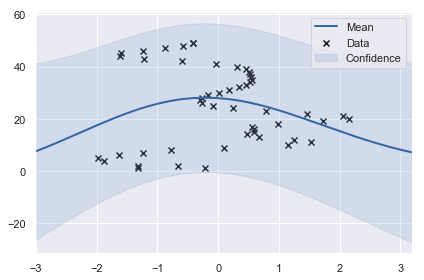

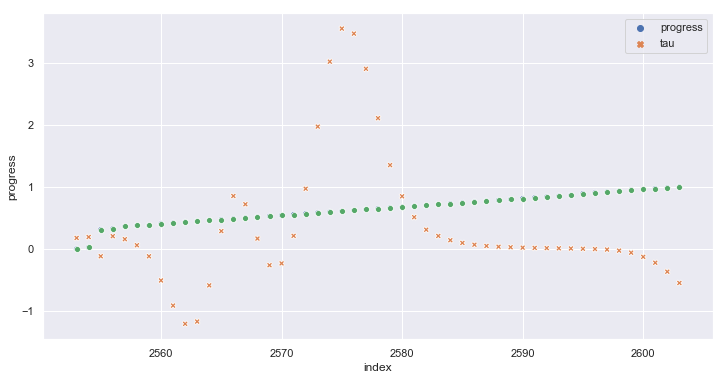

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


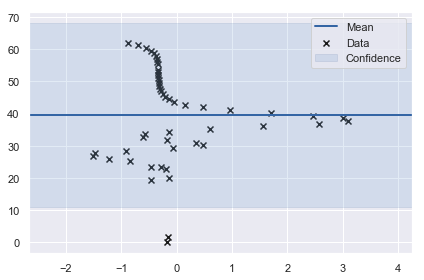

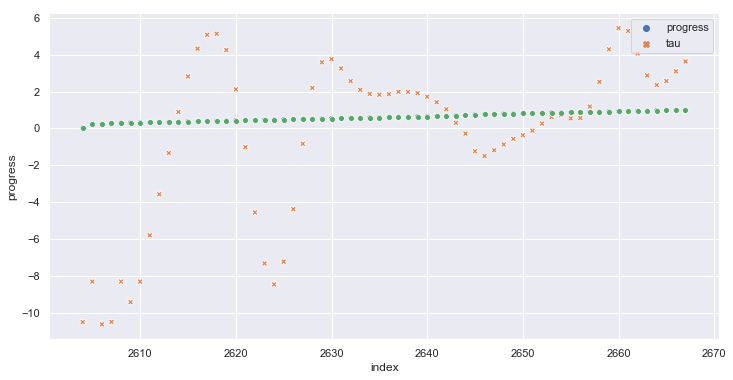

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


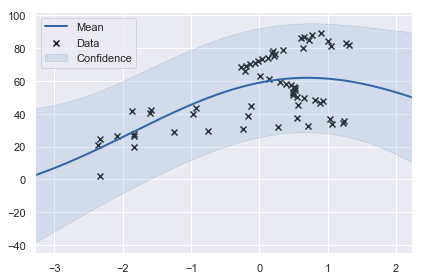

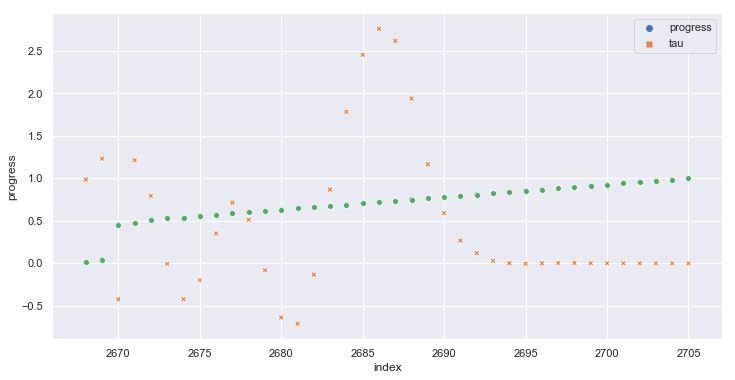

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


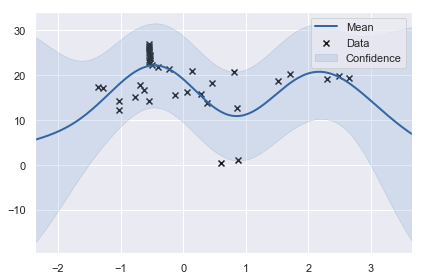

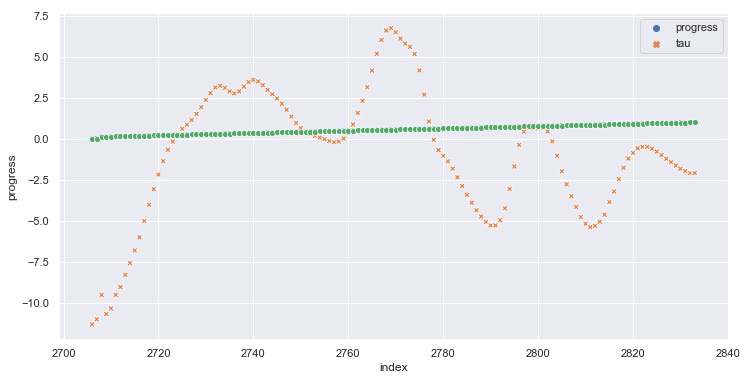

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


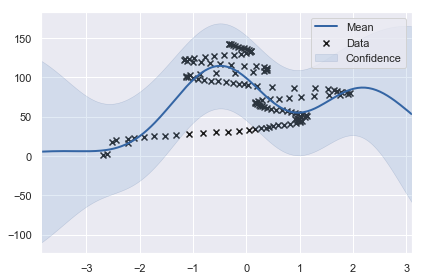

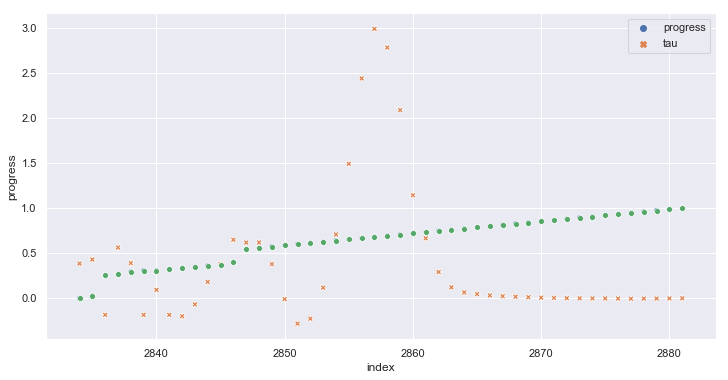

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


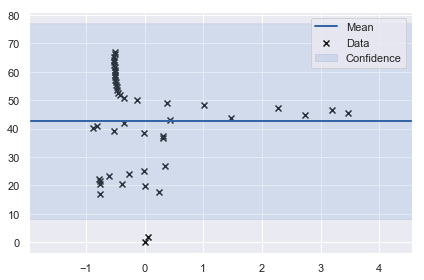

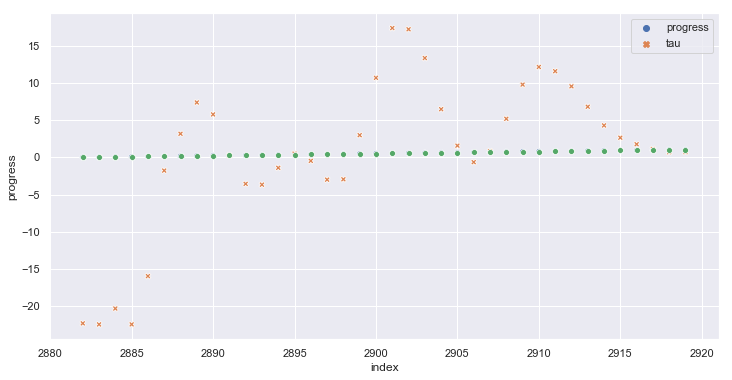

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


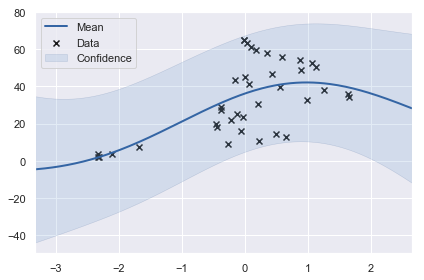

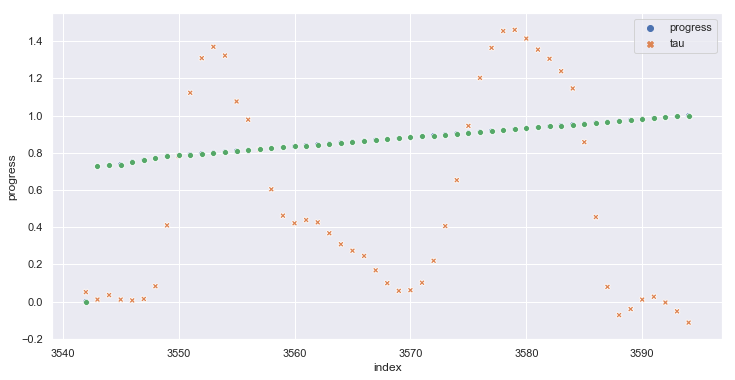

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


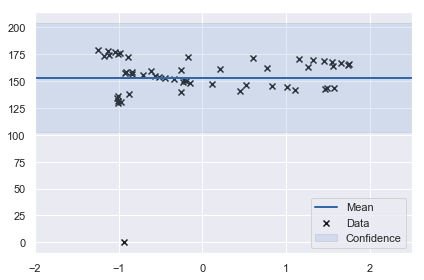

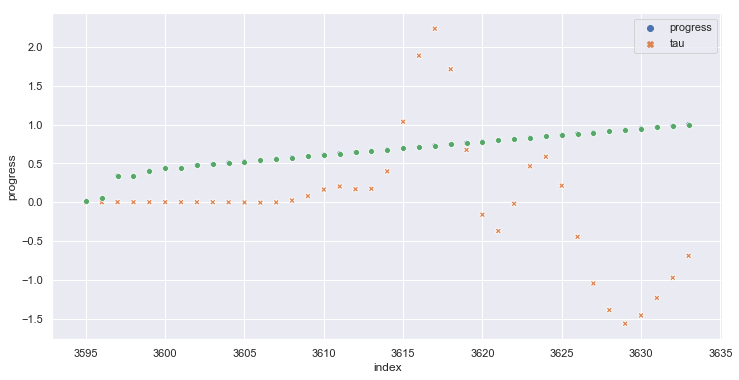

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


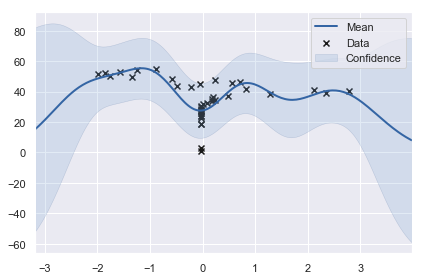

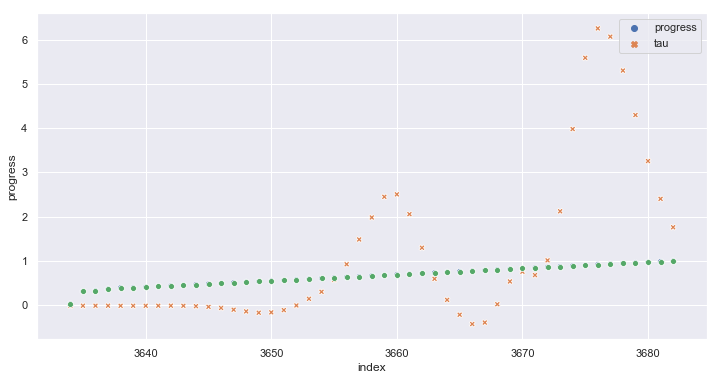

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


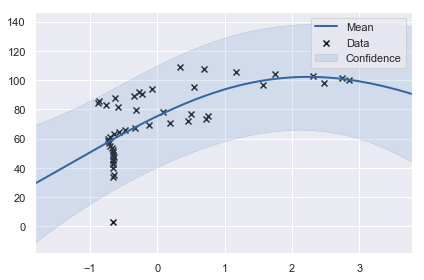

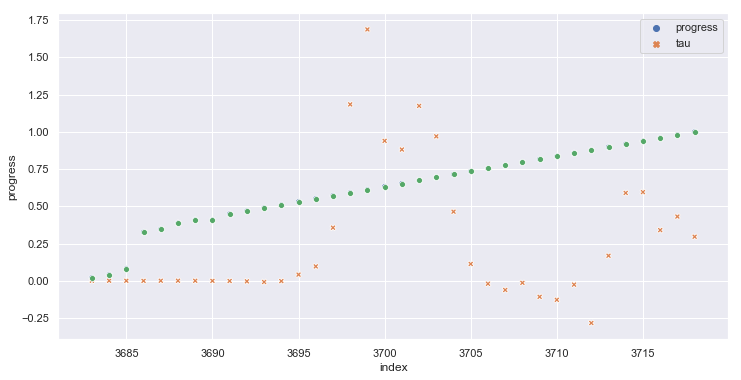

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


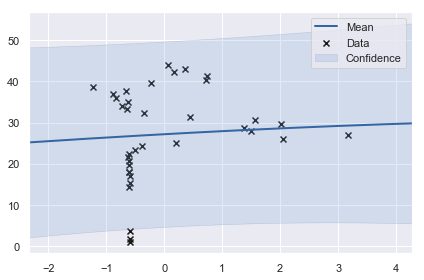

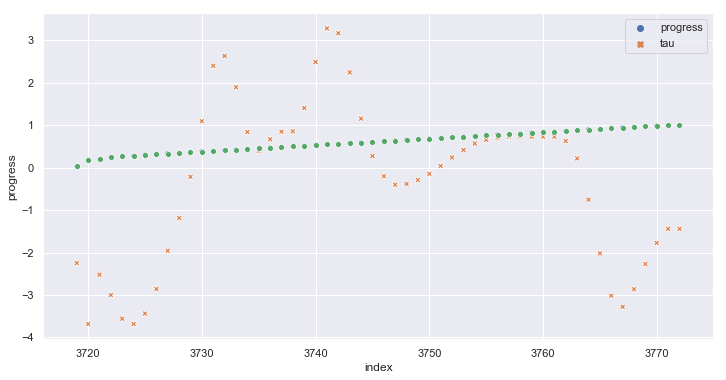

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


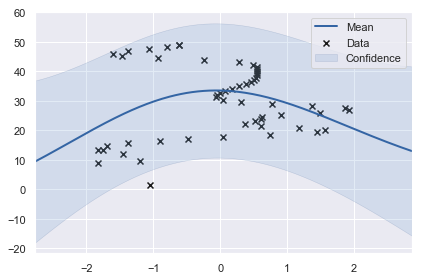

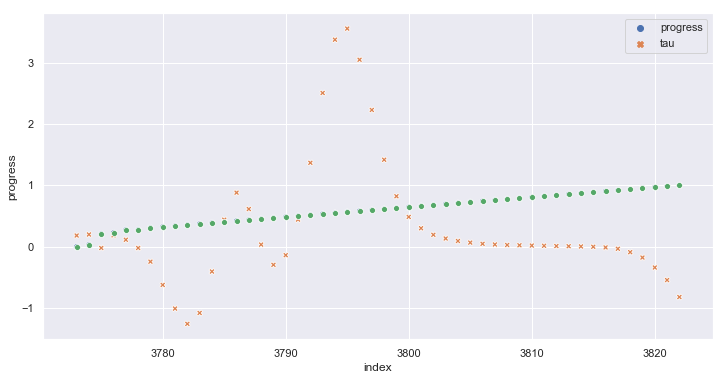

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


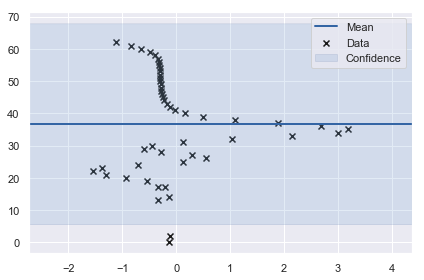

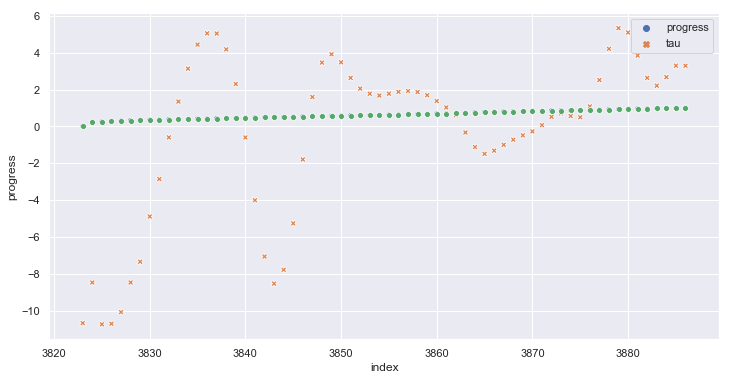

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


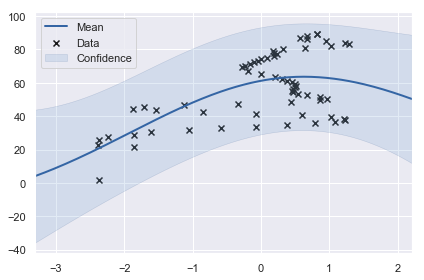

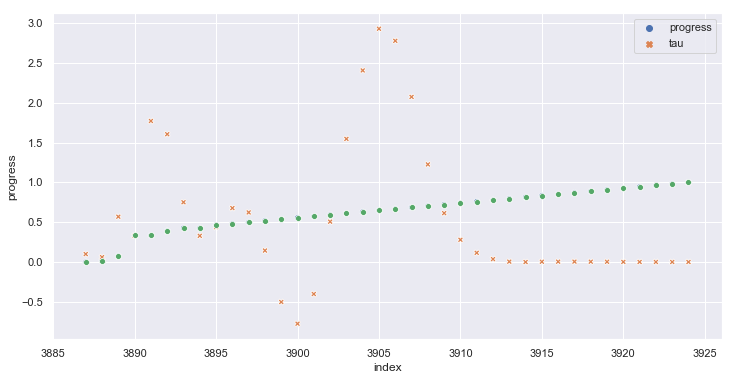

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


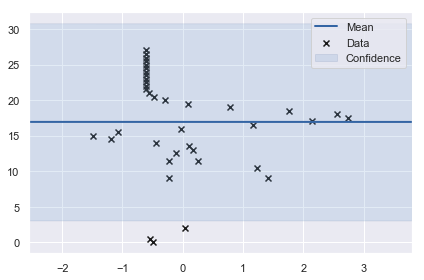

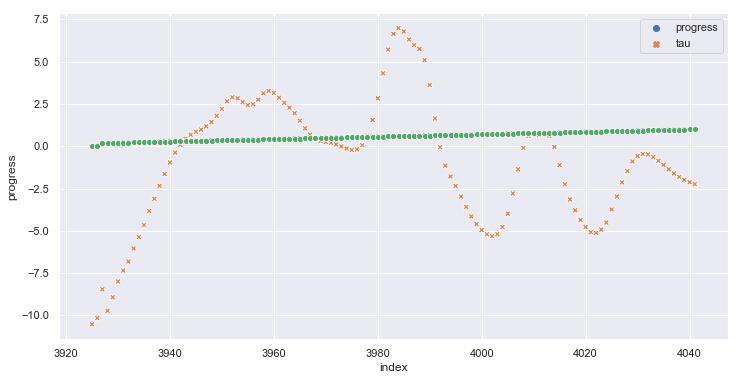

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


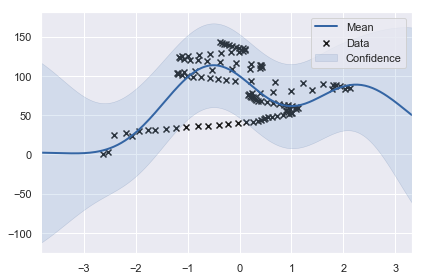

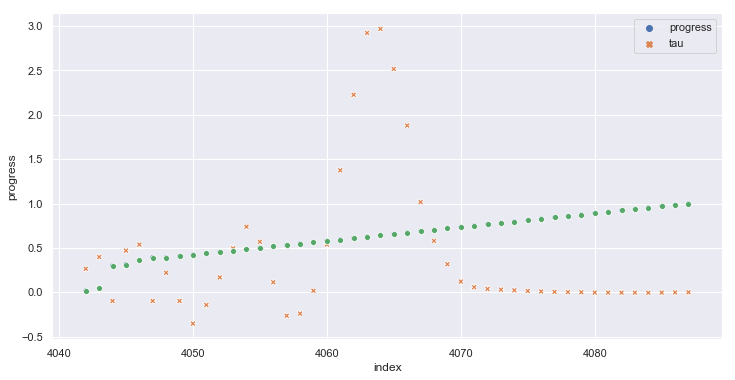

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


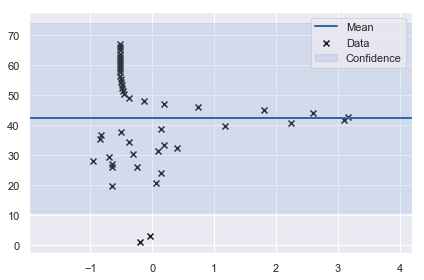

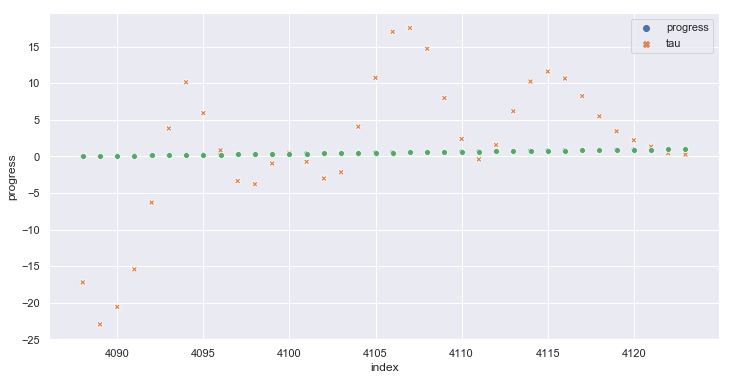

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


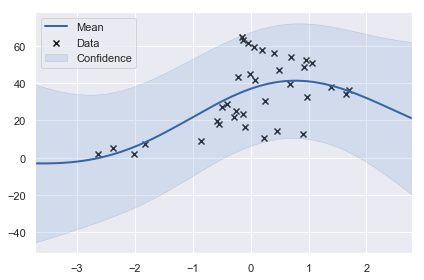

In [2]:
def synch_data(synch_gp, data):
    xy  = ['lat', 'lon']
    X = data[xy].values
    tau, _var = gp.predict(synch_gp, X)
    synched_data = data.copy()
    synched_data['tau'] = tau
    synched_data.drop(xy, axis=1)
    return synched_data
    
def train_gp(data, synch_gp, route_n, traj_n, seg_n):
    
    # Synchronise the trajectory
    synched_seg = synch_data(synch_gp, seg)
    
    # Learn GP to compute likelihood of new data
    likelihood_model = gp.build(synched_seg, 
                     ['tau'], 
                     ['lat', 'lon'], 
                     'likelihood-v1', 
                     route_n, 
                     traj_n, 
                     seg_n)
    gp.train(likelihood_model, 5)
    gp.save(likelihood_model)
    
    # Learn GP to predict arrival time from synchronised trajectory
    t = travel_times[route_n][traj_n]
    synched_seg['time_remaining'] = synched_seg.progress * t.seconds
    print(synched_seg.shape)
    #print(synched_seg[['tau', 'time_remaining']])
    plot.traj_progress(synched_seg) #, x='progress', y='tau')
    sns.scatterplot(data=synched_seg[['progress', 'tau']])
    
    prediction_model = gp.build(synched_seg, ['tau'], ['time_remaining'], 'predict', route_n, traj_n, seg_n)
    gp.train(prediction_model, 5)
    gp.save(prediction_model)
    sns.scatterplot(data=synched_seg.progress)
    gp.plot(prediction_model)
 
n_trajs = data.traj.unique()
#train_gp(data[data.seg == 2], synch_gps, route_n, synch_traj_n, 2)
#plot.traj_progress(data[data.seg == 2])

for traj_n in n_trajs:
    traj = data[data.traj == traj_n]
    for seg_n in n_segs:
        seg = traj[traj.seg == seg_n]
        synch_gp = synch_gps[seg_n]
        train_gp(seg, synch_gp, route_n, seg_n, traj_n)
       # sns.scatterplot(data=seg.progress)

Let's plot some of the GPs to see what they look like

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


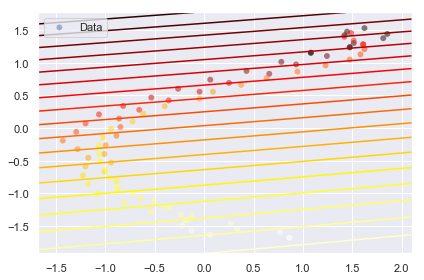

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


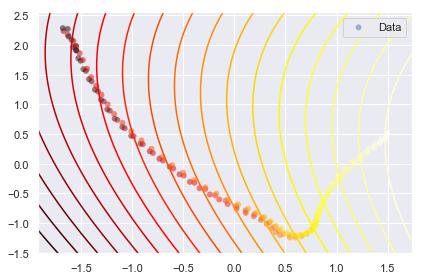

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


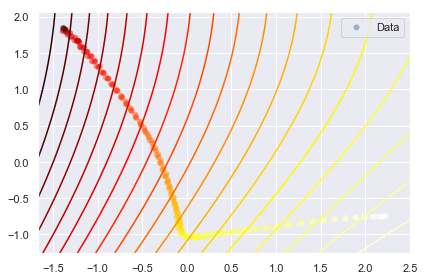

In [7]:
gp1 = gp.load(data[data.seg == 4], ['lat', 'lon'], ['progress'], 'likelihood-v1', route_n, 2, 4)
gp2 = gp.load(data[data.seg == 5], ['lat', 'lon'], ['progress'], 'likelihood-v1', route_n, 2, 5)
gp3 = gp.load(data[data.seg == 7], ['lat', 'lon'], ['progress'], 'likelihood-v1', route_n, 2, 7)
gp.plot(gp1)
gp.plot(gp2)
gp.plot(gp3)

The results look reasonable, even though they are not amazing. It looks fairly likely that each process could have generated respective data.

## Prediction
After having trained the GPs the model can now be presented with a new trajectory, look at the ones it has previously seen, rank them by likelihood and use them to make arrival time predictions.

In [8]:
# We load the parameters of the learned GPs once
learned_params = gp.load_all_params('likelihood-v1')
# together with the test data
test = pd.read_pickle('test.pkl')
# and the arrival times
with open('travel_times.pkl', 'rb') as handle:
    travel_times = pickle.load(handle)

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


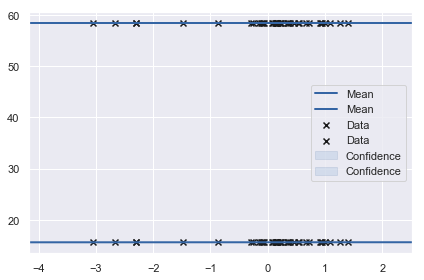

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


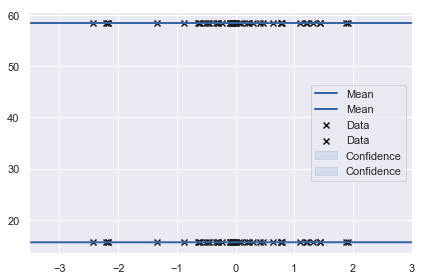

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


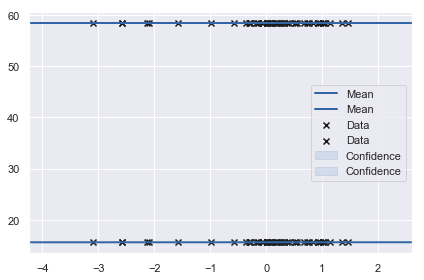

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


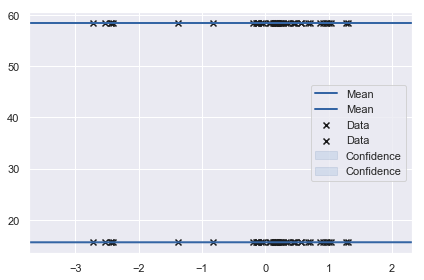

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


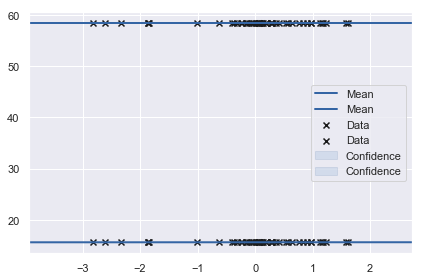

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


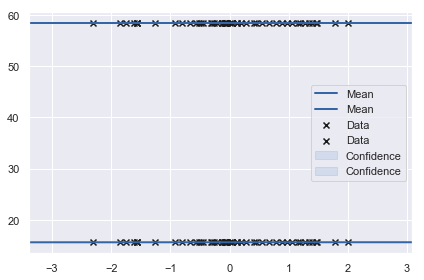

In [17]:
def predict(learned_params, synch_gps, traj):
    seg_n = traj.iloc[0].seg # assume all data points are from same seg as the first
    synch_gp = synch_gps[seg_n]
    synched_traj = synch_data(synch_gp, traj)
    gps = most_likely_learned_gp(learned_params, synch_gp, synched_traj)
   # arrival_times[gps
   # return trajs
    #learned_trajs = [gp.build(test_traj, )]
    gp.plot(gps[0])
        
    return gps

def most_likely_learned_gp(learned_params, synch_gp, traj):
    mk_model = lambda r, t, s, p: gp.set_params(gp.build(traj, ['tau'], ['lat', 'lon'], 'tmp', r, t, s), p)
    models = [mk_model(*p) for p in learned_params]
    return sorted(models, key=gp.loglik)
    
test_trajs = test[test.seg == seg_n]
n_test_trajs = test_trajs.traj.unique()
predictions = [predict(learned_params, synch_gps, test_trajs[test_trajs.traj == traj_n]) for traj_n in n_test_trajs]
